# Capstone project notebook for group : 10428

# Project Title :
# GLOBAL STOCK INDICES AND SECTORAL SUB-INDICES: CORRELATION DYNAMICS AND RISK CLUSTERING PRE- AND POST-COVID-19

## Project highlights and scope :
Many stock indices are used by the major equity markets around the world that showcase the state and trajectory of their respective national and industry-specific economies. Market investors, analysts, and policymakers use these indices as benchmarks, including the S&P 500 (US), FTSE 100 (UK), Nikkei 225 (Japan), Shanghai Composite (China), NIFTY 50 (India), Bovespa (Brazil) and many more to invest and diversify risk across the globe. Global equity markets were shocked by COVID-19, and cross-market correlation changed a lot. This emphasizes how important it is to examine and analyse these changing dynamics of the equity indices and sub indices in order to manage risk and diversify a portfolio effectively.

Our capstone project would examine and analyse the changing dynamics of the equity indices and sub-indices across the world in order to manage risk and diversify a portfolio effectively.

## Group and member details :
- Group number : 10428
- Members :
    - Emmanuel Oppong (oppongemma888@gmail.com)
    - Kinsuk Ghatak (kinsuk.analytics@gmail.com)

## Sec 1 : Extract and process the financial time series data for the main indices and sub indices

In [1]:
## Install packages :
import numpy as np
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller, acf
from scipy.stats import skew, kurtosis
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:

## Though we proposed a 10 years time line in our project proposal,
# we would like to revise the time line to 8 years here as this would help us with a decent volume to work on and focus on the core pre and post covid years.
def extract_data(Ticker, frequency):
  """
    Extract equity indices data from yfinance and calculate the percentage returns

    Parameters:
    ticker (str): index ticker symbol (e.g., 'AAPL', 'SPY')
    frequency (str): Data frequency ('1d', '1wk', '1mo', '1h', etc.)
    """
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")

  df['Close']=df['Close'].astype(float)
  df["pctg_return"]=df['Close'].pct_change()

  del df["Open"]
  # del df["Close"]
  del df["High"]
  del df["Low"]
  del df["Volume"]

  df = df.dropna()

  df.reset_index(inplace=True)

  return df



In [3]:
## Exatrct the data for the List of 6 indices :

Index_list= ['^GSPC', '^FTSE', '^GDAXI', '^N225', '000001.SS', '^NSEI', '^BVSP']
Index_Names=['S&P500', 'FTSE100', 'DAX', 'Nikkei225', 'Shanghai Composite', 'NIFTY50', 'Bovespa']
df_index_all=pd.DataFrame()

for index in Index_list:
  print(Index_list.index(index))
  df_index=extract_data(index, frequency='1d')
  df_index.columns = df_index.columns.droplevel(1)
  df_index=df_index[['Date','Close','pctg_return']]
  df_index['Index_name']=Index_Names[Index_list.index(index)]
  df_index['Index_id']=Index_list[Index_list.index(index)]
  df_index_all = pd.concat([df_index_all, df_index], axis=0, ignore_index=True)

df_index_all

0


/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")


1


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")


2
3


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")


4
5


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-1895637211.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(Ticker, interval=frequency,start="2016-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


6


Price,Date,Close,pctg_return,Index_name,Index_id
0,2016-01-05,2016.709961,0.002012,S&P500,^GSPC
1,2016-01-06,1990.260010,-0.013115,S&P500,^GSPC
2,2016-01-07,1943.089966,-0.023700,S&P500,^GSPC
3,2016-01-08,1922.030029,-0.010838,S&P500,^GSPC
4,2016-01-11,1923.670044,0.000853,S&P500,^GSPC
...,...,...,...,...,...
13898,2023-12-21,132182.000000,0.010535,Bovespa,^BVSP
13899,2023-12-22,132753.000000,0.004320,Bovespa,^BVSP
13900,2023-12-26,133533.000000,0.005876,Bovespa,^BVSP
13901,2023-12-27,134194.000000,0.004950,Bovespa,^BVSP


Indices found: ['^GSPC' '^FTSE' '^GDAXI' '^N225' '000001.SS' '^NSEI' '^BVSP']


<Figure size 1400x1000 with 0 Axes>

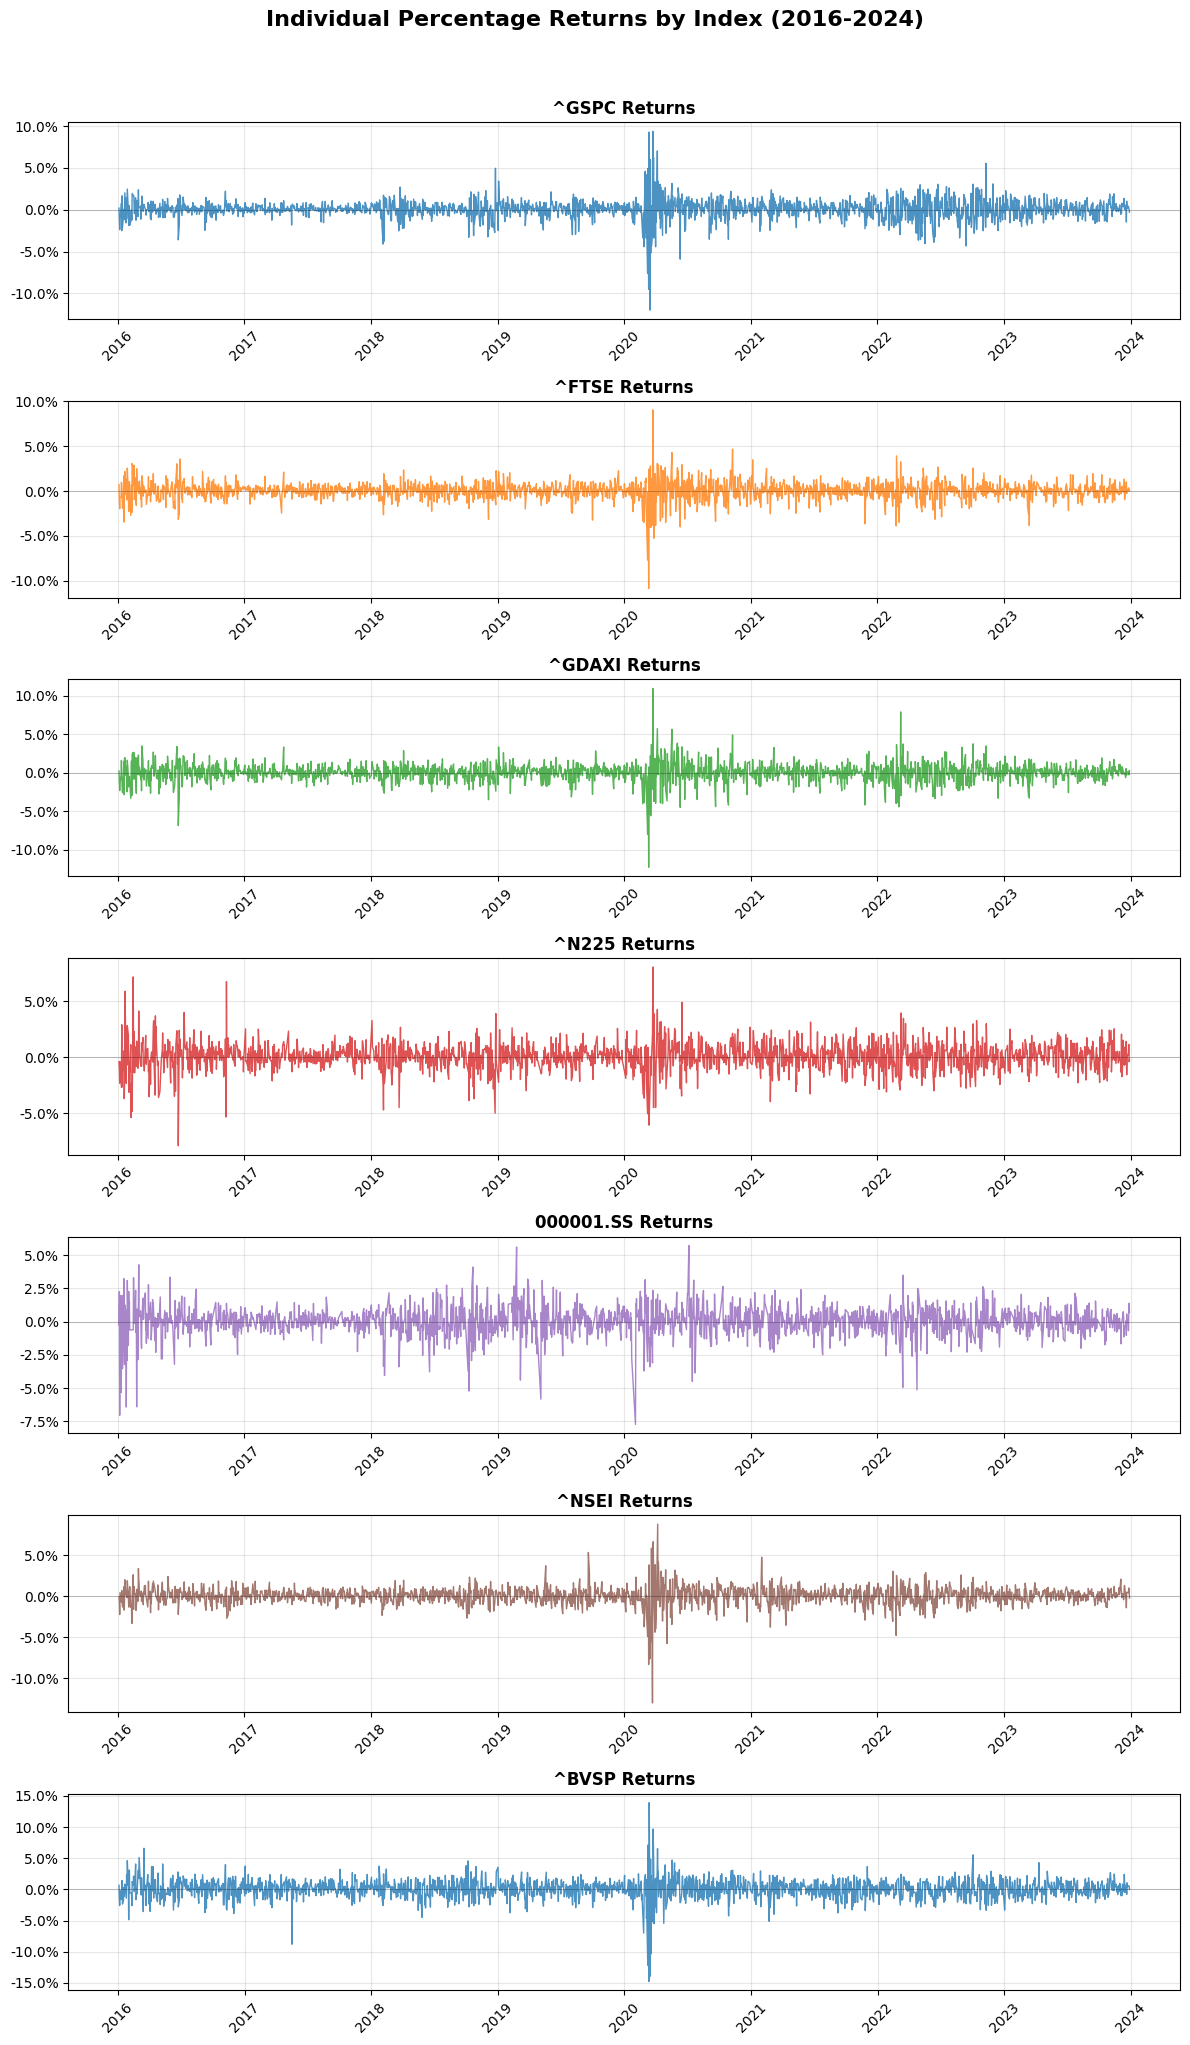


Basic Statistics for Percentage Returns:

^GSPC:
  Mean Return: 0.0005 (0.05%)
  Std Deviation: 0.0117 (1.17%)
  Min Return: -0.1198 (-11.98%)
  Max Return: 0.0938 (9.38%)

^FTSE:
  Mean Return: 0.0002 (0.02%)
  Std Deviation: 0.0101 (1.01%)
  Min Return: -0.1087 (-10.87%)
  Max Return: 0.0905 (9.05%)

^GDAXI:
  Mean Return: 0.0003 (0.03%)
  Std Deviation: 0.0121 (1.21%)
  Min Return: -0.1224 (-12.24%)
  Max Return: 0.1098 (10.98%)

^N225:
  Mean Return: 0.0004 (0.04%)
  Std Deviation: 0.0124 (1.24%)
  Min Return: -0.0792 (-7.92%)
  Max Return: 0.0804 (8.04%)

000001.SS:
  Mean Return: 0.0000 (0.00%)
  Std Deviation: 0.0108 (1.08%)
  Min Return: -0.0772 (-7.72%)
  Max Return: 0.0571 (5.71%)

^NSEI:
  Mean Return: 0.0006 (0.06%)
  Std Deviation: 0.0107 (1.07%)
  Min Return: -0.1298 (-12.98%)
  Max Return: 0.0876 (8.76%)

^BVSP:
  Mean Return: 0.0007 (0.07%)
  Std Deviation: 0.0158 (1.58%)
  Min Return: -0.1478 (-14.78%)
  Max Return: 0.1391 (13.91%)


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=df_index_all.copy()

# Assuming your dataframe is named 'df'
# Convert Date column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Get unique indices
indices = df['Index_id'].unique()
print(f"Indices found: {indices}")

# Create the plot
plt.figure(figsize=(14, 10))

# Define colors for each index
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
index_colors = dict(zip(indices, colors))

fig, axes = plt.subplots(7, 1, figsize=(12, 20))
axes = axes.flatten()

for i, index in enumerate(indices):
    # Filter data for current index
    index_data = df[df['Index_id'] == index].copy()
    index_data = index_data.sort_values('Date')

    # Plot on individual subplot
    axes[i].plot(index_data['Date'], index_data['pctg_return'],
                color=colors[i % len(colors)], linewidth=1, alpha=0.8)
    axes[i].set_title(f'{index} Returns', fontweight='bold', fontsize=12)
    axes[i].grid(True, alpha=0.3)
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=0.5)

    # Format y-axis
    axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

    # Rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Individual Percentage Returns by Index (2016-2024)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Optional: Calculate and display some basic statistics
print("\nBasic Statistics for Percentage Returns:")
print("=" * 50)
for index in indices:
    index_data = df[df['Index_id'] == index]['pctg_return']
    print(f"\n{index}:")
    print(f"  Mean Return: {index_data.mean():.4f} ({index_data.mean():.2%})")
    print(f"  Std Deviation: {index_data.std():.4f} ({index_data.std():.2%})")
    print(f"  Min Return: {index_data.min():.4f} ({index_data.min():.2%})")
    print(f"  Max Return: {index_data.max():.4f} ({index_data.max():.2%})")